In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000740663"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000740663
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST OF LONG ISLAND CORP
Ticker,FLIC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,11.0,2.217818e+01,9.863348e-01,19.89,21.81,22.14,22.76,23.72
net income,42.0,6.039595e+06,2.445724e+06,2222000.00,4686750.00,5501500.00,7554000.00,11111000.00
net interest income,42.0,1.715840e+07,5.465642e+06,8466000.00,14198500.00,16122500.00,21586500.00,26175000.00
provision for loan losses,42.0,7.310476e+05,9.589628e+05,-2302000.00,181000.00,944500.00,1148500.00,3649000.00


# Plots

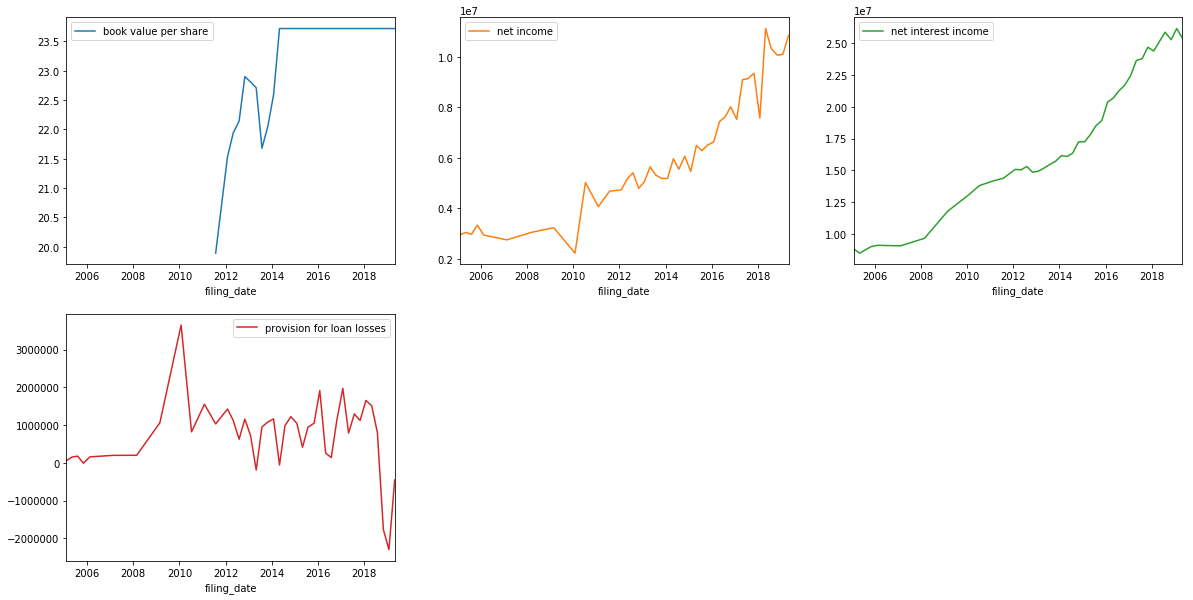

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000740663 book value per share       2004Q4 to 2011Q1: 26 periods  missing   
           book value per share                             2011Q3  missing   
           book value per share       2014Q2 to 2019Q1: 20 periods  missing   
           interest income                                    None    empty   
           net income                  2006Q1 to 2006Q3: 3 periods  missing   
           net income                  2007Q1 to 2007Q3: 3 periods  missing   
           net income                  2008Q1 to 2008Q3: 3 periods  missing   
           net income                  2009Q1 to 2009Q3: 3 periods  missing   
           net income                                       2010Q1  missing   
           net income                                       2010Q3  missing   
           net income                                       2011Q1  missing   
           net income                                       2011Q3  missing   
           net interest income         2006Q1 to 2006Q3: 3 periods  missing   
           net interest income         2007Q1 to 2007Q3: 3 periods  missing   
           net interest income         2008Q1 to 2008Q3: 3 periods  missing   
           net interest income         2009Q1 to 2009Q3: 3 periods  missing   
           net interest income                              2010Q1  missing   
           net interest income                              2010Q3  missing   
           net interest income                              2011Q1  missing   
           net interest income                              2011Q3  missing   
           provision for loan losses   2006Q1 to 2006Q3: 3 periods  missing   
           provision for loan losses   2007Q1 to 2007Q3: 3 periods  missing   
           provision for loan losses   2008Q1 to 2008Q3: 3 periods  missing   
           provision for loan losses   2009Q1 to 2009Q3: 3 periods  missing   
           provision for loan losses                        2010Q1  missing   
           provision for loan losses                        2010Q3  missing   
           provision for loan losses                        2011Q1  missing   
           provision for loan losses                        2011Q3  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000740663 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income            No values for item  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provis

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()